# Plot the Graph for the total number of issues with different labels created and closed on every date on GitHub for SPM587FA17 issues project

### Example of Issue Form Filled out

### Data Set File:  SPM587FA17issues.json

In [1]:
import os

import cPickle as pickle

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline



# Requirement : Get the total number of issues with different labels for every date and plot them in a stacked chart

In [2]:
# Read the JSON file into a list of dictionaries

import json
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587FA17issues.json')]

In [3]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [4]:
# Sanity test: print first 10 rows in our DataFrame

issues_df
    

,Author,State,closed_at,created_at,issue_number,labels
0,PSCM587FA17,open,None,2017-11-17,656,"[Category: Inquiry, Category:Bug, Category:Enh..."
1,SFA17SCM79V,closed,2017-11-17,2017-11-17,654,"[Category:Enhancement, DetectionPhase: Testing..."
2,KFA17SCM02G,closed,2017-11-17,2017-11-17,652,"[Category: Inquiry, DetectionPhase:Field, Orig..."
3,SFA17SCM20B,closed,2017-11-17,2017-11-17,647,"[Category: Inquiry, DetectionPhase:Field, Orig..."
4,SFA17SCM20B,closed,2017-11-17,2017-11-17,646,[]
5,CFA17SCM01P,closed,2017-11-17,2017-11-17,640,"[Category:Bug, DetectionPhase: Testing, Origin..."
6,PFA17SCM81P,closed,2017-11-17,2017-11-17,634,"[Category:Bug, DetectionPhase: Testing, Origin..."
7,MFA17SCM37K,open,None,2017-11-17,625,"[Category:Bug, DetectionPhase: Testing, Origin..."
8,MFA17SCM67J,closed,2017-11-17,2017-11-17,623,"[Category:Enhancement, DetectionPhase: Testing..."
9,VFA17SCM36S,closed,2017-11-17,2017-11-17,621,"[Category: Inquiry, DetectionPhase:Field, Orig..."


In [5]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN


In [6]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status
0,PSCM587FA17,open,None,2017-11-17,656,"[Category: Inquiry, Category:Bug, Category:Enh...",NaN,NaN,NaN,NaN,NaN
1,SFA17SCM79V,closed,2017-11-17,2017-11-17,654,"[Category:Enhancement, DetectionPhase: Testing...",NaN,NaN,NaN,NaN,NaN
2,KFA17SCM02G,closed,2017-11-17,2017-11-17,652,"[Category: Inquiry, DetectionPhase:Field, Orig...",NaN,NaN,NaN,NaN,NaN
3,SFA17SCM20B,closed,2017-11-17,2017-11-17,647,"[Category: Inquiry, DetectionPhase:Field, Orig...",NaN,NaN,NaN,NaN,NaN
4,SFA17SCM20B,closed,2017-11-17,2017-11-17,646,[],NaN,NaN,NaN,NaN,NaN
5,CFA17SCM01P,closed,2017-11-17,2017-11-17,640,"[Category:Bug, DetectionPhase: Testing, Origin...",NaN,NaN,NaN,NaN,NaN
6,PFA17SCM81P,closed,2017-11-17,2017-11-17,634,"[Category:Bug, DetectionPhase: Testing, Origin...",NaN,NaN,NaN,NaN,NaN
7,MFA17SCM37K,open,None,2017-11-17,625,"[Category:Bug, DetectionPhase: Testing, Origin...",NaN,NaN,NaN,NaN,NaN
8,MFA17SCM67J,closed,2017-11-17,2017-11-17,623,"[Category:Enhancement, DetectionPhase: Testing...",NaN,NaN,NaN,NaN,NaN
9,VFA17SCM36S,closed,2017-11-17,2017-11-17,621,"[Category: Inquiry, DetectionPhase:Field, Orig...",NaN,NaN,NaN,NaN,NaN


In [7]:
for i in range(0, len(wrangled_issues_df)):
   if wrangled_issues_df.iloc[i]['labels']:
        for label in wrangled_issues_df.iloc[i]['labels']:
            label_name= (label.split(':'))[0]
            label_value= (label.split(':'))[1]
            wrangled_issues_df.loc[i, label_name]=label_value
 

In [8]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status
0,PSCM587FA17,open,None,2017-11-17,656,"[Category: Inquiry, Category:Bug, Category:Enh...",NaN,NaN,Enhancement,NaN,NaN
1,SFA17SCM79V,closed,2017-11-17,2017-11-17,654,"[Category:Enhancement, DetectionPhase: Testing...",Design,Testing,Enhancement,Critical,Approved
2,KFA17SCM02G,closed,2017-11-17,2017-11-17,652,"[Category: Inquiry, DetectionPhase:Field, Orig...",Testing,Field,Inquiry,Low,inProgress
3,SFA17SCM20B,closed,2017-11-17,2017-11-17,647,"[Category: Inquiry, DetectionPhase:Field, Orig...",Coding,Field,Inquiry,Medium,inProgress
4,SFA17SCM20B,closed,2017-11-17,2017-11-17,646,[],NaN,NaN,NaN,NaN,NaN
5,CFA17SCM01P,closed,2017-11-17,2017-11-17,640,"[Category:Bug, DetectionPhase: Testing, Origin...",Design,Testing,Bug,Major,Approved
6,PFA17SCM81P,closed,2017-11-17,2017-11-17,634,"[Category:Bug, DetectionPhase: Testing, Origin...",Design,Testing,Bug,Critical,Approved
7,MFA17SCM37K,open,None,2017-11-17,625,"[Category:Bug, DetectionPhase: Testing, Origin...",Design,Testing,Bug,Critical,Approved
8,MFA17SCM67J,closed,2017-11-17,2017-11-17,623,"[Category:Enhancement, DetectionPhase: Testing...",Design,Testing,Enhancement,Major,Completed
9,VFA17SCM36S,closed,2017-11-17,2017-11-17,621,"[Category: Inquiry, DetectionPhase:Field, Orig...",Coding,Field,Inquiry,Low,inProgress


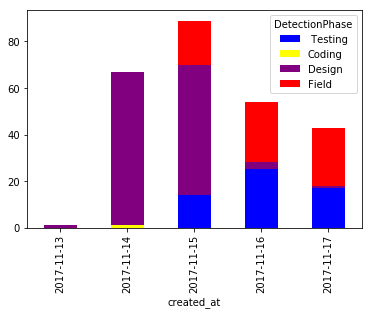

In [9]:
# Plot in Bar Chart the total number of issues created every day for every Detaction Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['created_at','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

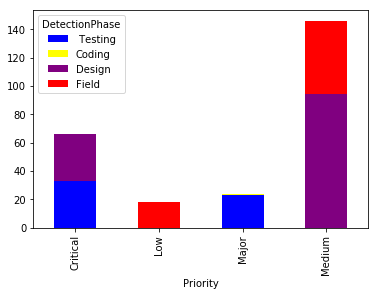

In [10]:
# Plot in Bar Chart the total number of issues created for every Phase based on thier priorites

LabelsReviewedByDate = wrangled_issues_df.groupby(['Priority','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

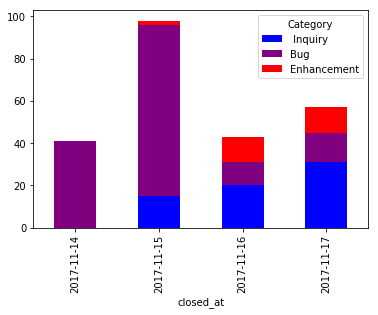

In [11]:
# Plot in Bar Chart the total number of issues closed every day for every Category

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','Category']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red'], grid=False)

#  Requirement #1: Plot in Bar Chart the total number of issues closed every day for every Origination Phase


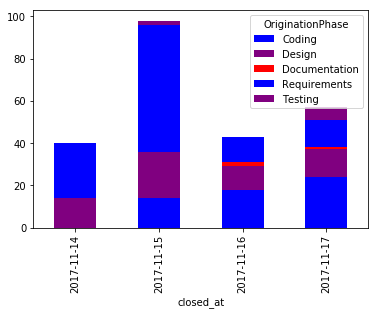

In [13]:
# Requirement #1: Add your code here
LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','OriginationPhase']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red'], grid=False)



#  Requirement #2: # Plot in Bar Chart the total number of issues created for every Phase based on their Status



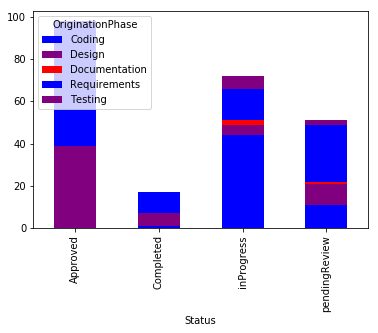

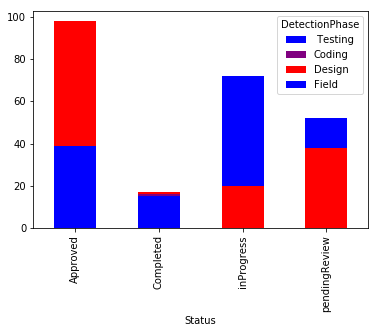

In [21]:
# Requirement #2: Add your code here
LabelsReviewedByDate = wrangled_issues_df.groupby(['Status','OriginationPhase']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red'], grid=False)

LabelsReviewedByDate = wrangled_issues_df.groupby(['Status','DetectionPhase']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red'], grid=False)
